In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('teen_phone_addiction_dataset.csv')

# Display basic info
print(df.info())

# Display first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       2995 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          2992 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

### Question 1

Check Below
- DataFrame Shape
- Data Types
- Duplicate records (remove if found)
- Missing/Null Values (replace with median value)

In [2]:
# Load the dataset
df = pd.read_csv('teen_phone_addiction_dataset.csv')

# DataFrame Shape
print("DataFrame Shape:")
print(df.shape)

# Data Types
print("\nData Types:")
print(df.dtypes)

# Duplicate Records and Removal
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Records Found: {duplicate_count}")
df = df.drop_duplicates()

# Missing/Null Values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Replace missing values in numeric columns with median
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Checking again for missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


DataFrame Shape:
(3000, 25)

Data Types:
ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object

Duplicate Records Found: 0

Missing Values Before Cleaning:
ID                         0
Name 

C:\Users\kamran tech\AppData\Local\Temp\ipykernel_12772\551407295.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


### Question 2:

How does time spent on social media compare to time spent on education among teens?

- Plot side-by-side histograms of Time on Social Media and Time on Education
- Find and compare the median time for both.
- Write simple comments to explain what the data shows

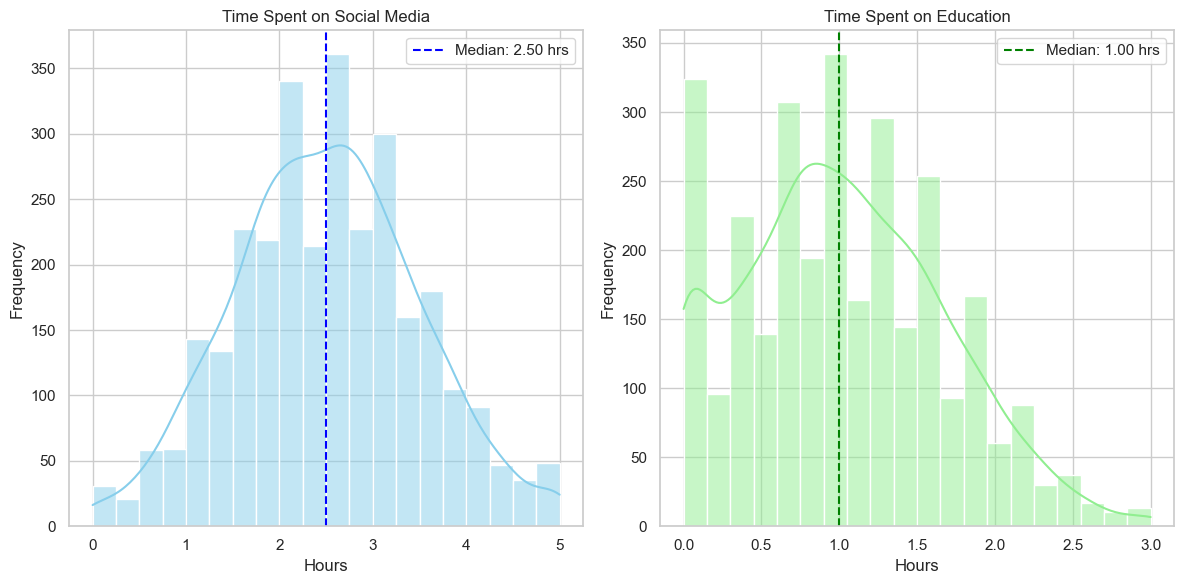

Median Time on Social Media: 2.5 hours/day
Median Time on Education: 1.0 hours/day


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Extract relevant columns
social_media = df['Time_on_Social_Media']
education = df['Time_on_Education']

# Calculate medians
median_social_media = social_media.median()
median_education = education.median()

# Plot side-by-side histograms
plt.figure(figsize=(12, 6))

# Histogram for Time on Social Media
plt.subplot(1, 2, 1)
sns.histplot(social_media, bins=20, color='skyblue', kde=True)
plt.axvline(median_social_media, color='blue', linestyle='--', label=f'Median: {median_social_media:.2f} hrs')
plt.title('Time Spent on Social Media')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Time on Education
plt.subplot(1, 2, 2)
sns.histplot(education, bins=20, color='lightgreen', kde=True)
plt.axvline(median_education, color='green', linestyle='--', label=f'Median: {median_education:.2f} hrs')
plt.title('Time Spent on Education')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print median values
print(f"Median Time on Social Media: {median_social_media} hours/day")
print(f"Median Time on Education: {median_education} hours/day")


### Question 3

- How can we detect and identify outliers in Daily Usage Hours, Exercise Hours, and Screen Time Before Bed among teens using the IQR method?
- Display the records corresponding to these outliers using boxplot.



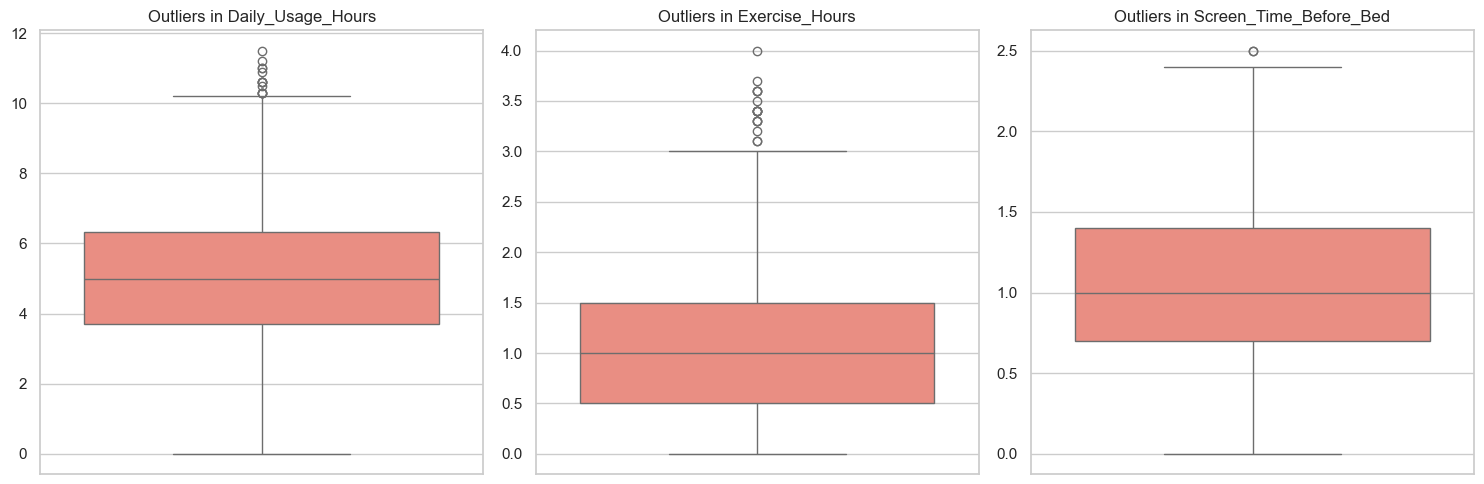


🔸 Daily_Usage_Hours - Outliers Found: 14


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
227,228,Michael Hopkins,18,Female,North Austin,9th,10.6,9.1,93,8,...,1.4,36,7,3.7,1.2,2.5,Other,8,6.3,10.0
582,583,Julia Rogers,16,Female,Desireeland,8th,10.5,8.0,97,10,...,1.0,128,16,1.9,0.0,0.9,Social Media,10,3.7,10.0
710,711,Pamela Johnson,15,Male,Derrickville,8th,11.0,7.7,59,2,...,2.1,81,10,1.6,1.6,1.4,Browsing,8,6.2,10.0



🔸 Exercise_Hours - Outliers Found: 17


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
56,57,Mrs. Lauren Ayala,17,Other,Port Dustin,10th,3.3,6.1,78,2,...,1.2,141,17,1.9,1.0,0.2,Education,8,5.1,9.4
126,127,Sonya Armstrong,13,Other,North Brian,7th,4.4,5.0,68,7,...,1.8,70,18,2.4,1.1,0.7,Browsing,2,5.1,10.0
608,609,Alfred Crawford,17,Other,West Eric,11th,5.2,7.8,75,8,...,1.4,134,15,1.5,1.8,0.2,Other,6,5.7,10.0



🔸 Screen_Time_Before_Bed - Outliers Found: 2


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
1775,1776,Katherine Williams,18,Male,New Joseph,7th,4.9,7.7,85,8,...,2.5,55,10,2.9,0.9,1.8,Browsing,1,6.1,8.0
1953,1954,Deborah Miller,16,Female,North David,8th,3.4,8.6,63,1,...,2.5,110,6,4.9,1.1,2.2,Social Media,8,3.2,8.5


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to check for outliers
columns_to_check = ['Daily_Usage_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed']

# Dictionary to store outlier records
outlier_records = {}

# Create boxplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_check, 1):
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_records[col] = outliers

    # Plot boxplot
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f'Outliers in {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Print number of outliers and preview top 3 outlier records per column
for col, out_df in outlier_records.items():
    print(f"\n🔸 {col} - Outliers Found: {len(out_df)}")
    display(out_df.head(3))


### Question 4

Analyze the correlation heatmap showing relationships between teen behaviors, screen usage, and mental health indicators.

Focus your attention on the following numeric variables:

- Daily_Usage_Hours, Sleep_Hours, Academic_Performance, Addiction_Level, Time_on_Social_Media,

- Time_on_Gaming, Time_on_Education, Apps_Used_Daily, Anxiety_Level, Depression_Level,

- Self_Esteem, Social_Interactions, Exercise_Hours, Screen_Time_Before_Bed,

- Phone_Checks_Per_Day, Family_Communication, Weekend_Usage_Hours


Identify two strong positive and two strong negative correlation involving any of the above variables.

Explain briefly what these correlations might suggest about teen behavior, wellbeing, or digital habits.

Use specific values from the heatmap to support your observation.



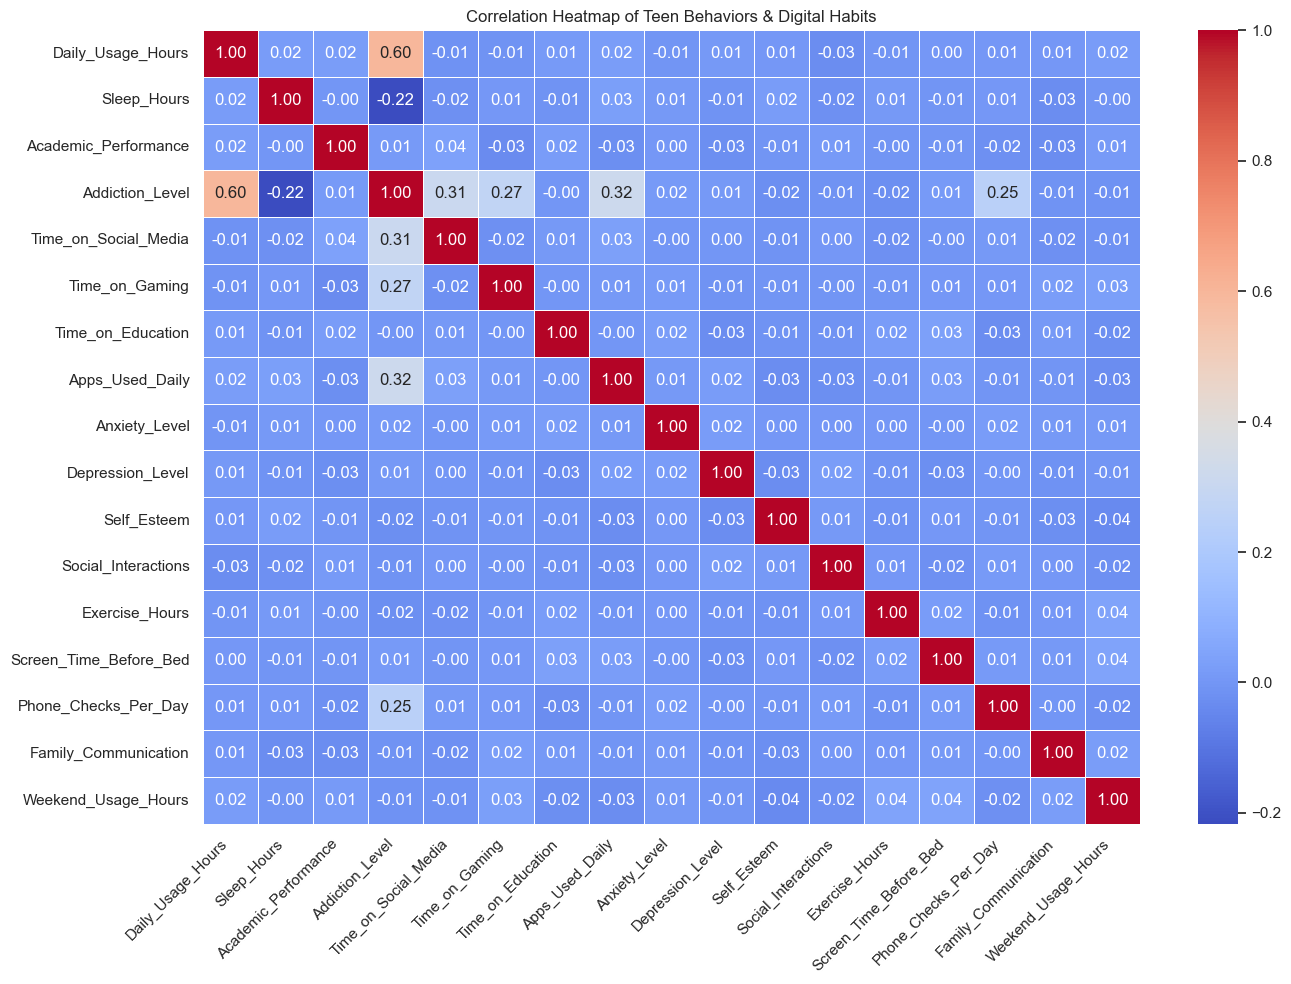

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specified numeric columns
cols = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Addiction_Level',
    'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Apps_Used_Daily',
    'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Social_Interactions',
    'Exercise_Hours', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day',
    'Family_Communication', 'Weekend_Usage_Hours'
]

# Compute correlation matrix
correlation_matrix = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Teen Behaviors & Digital Habits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Observation

**Two Strong Positive Correlations**
Daily_Usage_Hours ↔ Addiction_Level

- Correlation: +0.60
- Interpretation: Teens who spend more hours daily on their phones tend to report higher addiction levels. This suggests a direct link between screen time and dependency on mobile devices.

**Time_on_Gaming ↔ Addiction_Level**

- Correlation: +0.32
- While not extremely strong, this is one of the higher positive correlations, indicating that more time spent gaming is associated with higher perceived addiction levels.

***Summary Interpretation***
- Teens who spend more time daily on their phones and on gaming are more likely to report high addiction levels.
- Higher addiction levels are weakly linked to poorer sleep and lower academic performance.
- Most correlations in this dataset are weak, which suggests complex and indirect relationships between digital behavior and wellbeing.

### Question 5

How does the average addiction level vary across different age groups? Show with line graph

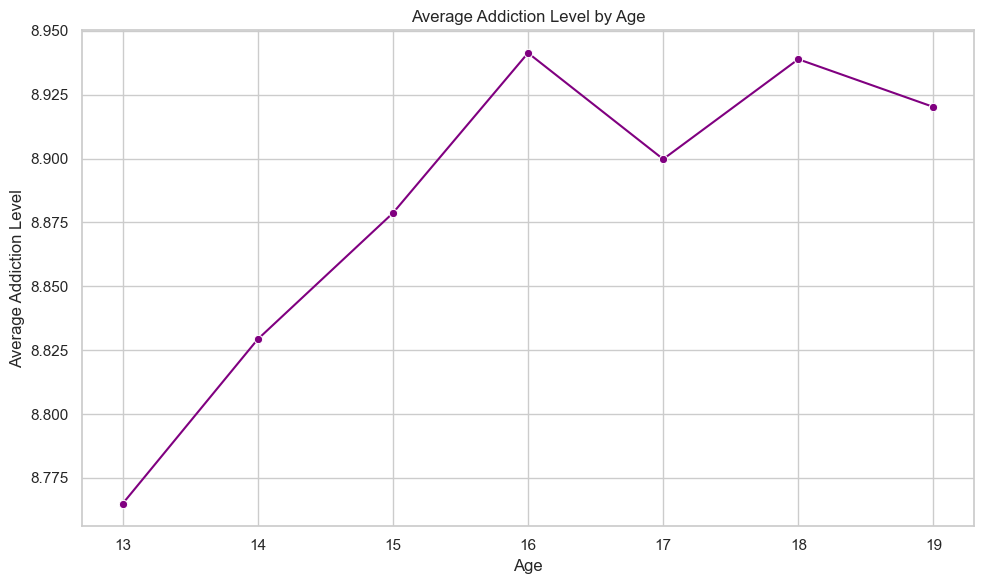

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Age and calculate average Addiction Level
age_addiction = df.groupby('Age')['Addiction_Level'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_addiction, x='Age', y='Addiction_Level', marker='o', color='purple')
plt.title('Average Addiction Level by Age')
plt.xlabel('Age')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.xticks(age_addiction['Age'])  # Show all age ticks
plt.tight_layout()
plt.show()